In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head(10)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
5,2.158224,2.745451,1
6,8.172223,7.328995,0
7,8.719652,6.228618,0
8,6.779079,6.630667,0
9,3.043633,4.642650,1


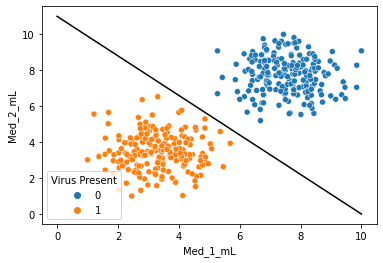

In [4]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

## create a hyperplane - 2d line
x = np.linspace(0,10,100)
m = -1.1
b = 11

y = m*x+b
plt.plot(x,y, 'black')

In [5]:
from sklearn.svm import SVC

In [6]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [7]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [8]:
model = SVC(kernel='linear', C=0.005)  ## C as soft margin parameter

In [9]:
model.fit(X,y)

SVC(C=0.005, kernel='linear')

In [10]:
from svm_margin_plot import plot_svm_boundary

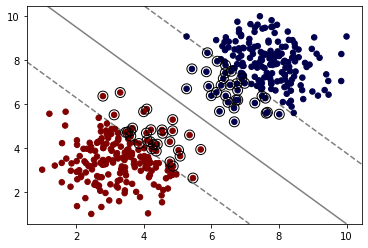

In [11]:
plot_svm_boundary(model, X,y)

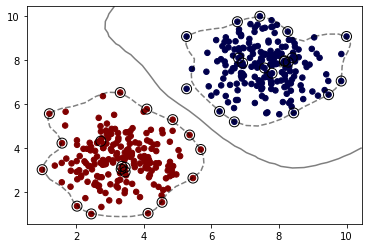

In [12]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X,y)
plot_svm_boundary(model, X,y)

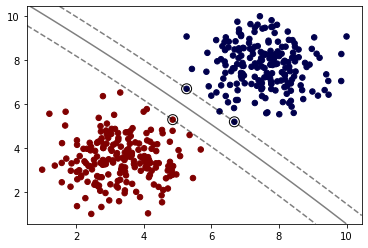

In [13]:
model = SVC(kernel='poly',C=1, gamma='auto')
model.fit(X,y)
plot_svm_boundary(model, X,y)                    

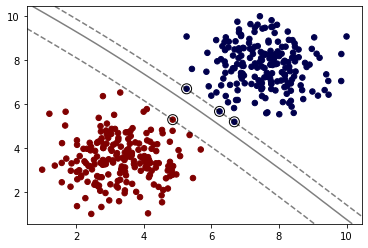

In [14]:
model = SVC(kernel='poly',degree=10 ,C=0.005, gamma='auto')
model.fit(X,y)
plot_svm_boundary(model, X,y)

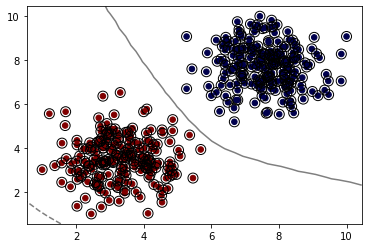

In [15]:
model = SVC(kernel='sigmoid',C=1, gamma='auto')
model.fit(X,y)
plot_svm_boundary(model, X,y)